In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 20})

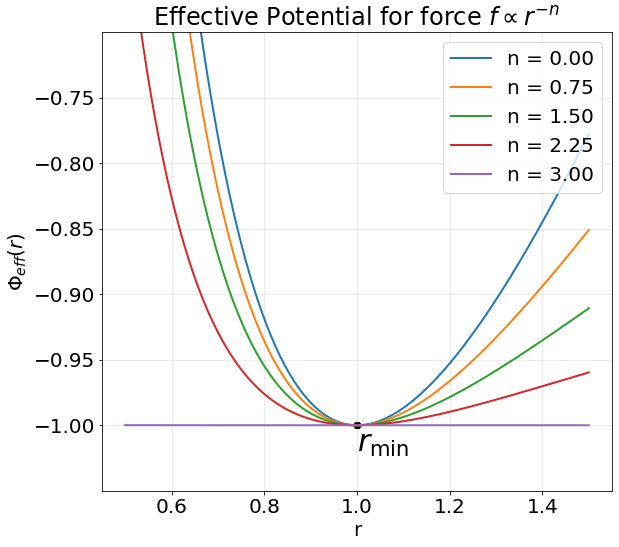

In [50]:
# Constants
m = 1.0    # Mass of the orbiting body
L = 1.0    # Angular momentum
k = 1.0    # Proportionality constant in the force

# List of power-law indices to consider between 0 and 2.9
n_values = np.linspace(0, 2.9999, 5)  # Adjust the number of points as needed

# Set up the plot
plt.figure(figsize=(9, 8))

# Compute the minimum of each effective potential and shift to coincide
vmax = -1e+6
for n in n_values:
    # Compute the exponent in r_min calculation
    exponent = 3 - n

    # Calculate r_min, the position of the minimum effective potential
    r_min = (L**2 / (m * k)) ** (1 / exponent)
    
    # Define a range of r values around r_min
    r_start = r_min * 0.5
    r_end = r_min * 1.5
    r = np.linspace(r_start, r_end, 500)
    
    # Compute the potential Phi(r)
    if n != 1:
        Phi = k / (1 - n) * r ** (1 - n)
    else:
        Phi = k * np.log(r)
    
    # Compute the centrifugal term
    centrifugal = L**2 / (2 * m * r**2)
    
    # Compute the effective potential V_eff(r)
    V_eff = Phi + centrifugal
    
    # Shift the potential so that V_eff(r_min) is negative
    V_min_index = np.argmin(V_eff)
    V_min = V_eff[V_min_index]
    V_eff_shifted = V_eff - V_min - 1  # Subtract V_min and an extra 1 to make it negative
    
    # Plot the effective potential
    plt.plot(r, V_eff_shifted, label=f'n = {n:.2f}', lw=2)
    
    # Mark the minimum point
    plt.scatter(r[V_min_index], V_eff_shifted[V_min_index], c='black')

    # Compute max(Veff) at large r
    vmax = np.max([vmax, V_eff_shifted[-1]])

plt.xlabel('r')
plt.ylabel(r'$\Phi_{eff}(r)$')
plt.title(r'Effective Potential for force $f\propto r^{-n}$')
plt.legend(loc="upper right")
plt.grid(True)
plt.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)
plt.ylim(top=0.9*vmax)

plt.text(r[V_min_index], 1.02*V_eff_shifted[V_min_index], r'$r_{\rm min}$', fontsize=30)

plt.tight_layout()
plt.savefig("../Figures/near_circular_orbit_phieff.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()
